The purpose of this project is to find a state and county within the United States for us to buy a home.

In [5]:
#Combine both CSV's and average rankings
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go 

In [6]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [7]:
init_notebook_mode(connected=True)

In [8]:
#downloaded from https://www.usnews.com/news/best-states/rankings
best = pd.read_csv('BestStates.csv')
best

,State,Health Care,Education,Economy,Infrastructure,Opportunity,Fiscal Stability,Crime & Corrections,Natural Environment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Washington,4.0,4.0,3.0,2.0,19.0,22.0,15.0,14.0
3,New Hampshire,16.0,5.0,13.0,31.0,1.0,10.0,1.0,4.0
4,Minnesota,10.0,17.0,18.0,6.0,3.0,25.0,16.0,3.0
5,Utah,9.0,10.0,2.0,3.0,24.0,5.0,12.0,49.0
6,Vermont,11.0,8.0,29.0,28.0,10.0,19.0,2.0,7.0
7,Maryland,8.0,13.0,26.0,21.0,5.0,15.0,22.0,25.0
8,Virginia,18.0,7.0,25.0,35.0,9.0,8.0,9.0,18.0
9,Massachusetts,2.0,1.0,7.0,44.0,29.0,30.0,4.0,26.0


In [9]:
#Need to remove NAN
best = best.dropna(how='any')
best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 55
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                50 non-null     object 
 1   Health Care          50 non-null     float64
 2   Education            50 non-null     float64
 3   Economy              50 non-null     float64
 4   Infrastructure       50 non-null     float64
 5   Opportunity          50 non-null     float64
 6   Fiscal Stability     50 non-null     float64
 7   Crime & Corrections  50 non-null     float64
 8   Natural Environment  50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.9+ KB


In [10]:
# Abbreviate state names
def convert_state_name(name):
    code=str(name)
    us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
    return us_state_abbrev[code]

best['Code'] = best.State.apply(lambda x:convert_state_name(x)) 

C:\Users\kelly\anaconda3\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
#Change order of columns in order of weight
best = best[['State', 'Code', 'Health Care', 'Economy', 'Natural Environment', 'Crime & Corrections', 'Opportunity', 'Fiscal Stability', 'Infrastructure', 'Education']]
best

,State,Code,Health Care,Economy,Natural Environment,Crime & Corrections,Opportunity,Fiscal Stability,Infrastructure,Education
2,Washington,WA,4.0,3.0,14.0,15.0,19.0,22.0,2.0,4.0
3,New Hampshire,NH,16.0,13.0,4.0,1.0,1.0,10.0,31.0,5.0
4,Minnesota,MN,10.0,18.0,3.0,16.0,3.0,25.0,6.0,17.0
5,Utah,UT,9.0,2.0,49.0,12.0,24.0,5.0,3.0,10.0
6,Vermont,VT,11.0,29.0,7.0,2.0,10.0,19.0,28.0,8.0
7,Maryland,MD,8.0,26.0,25.0,22.0,5.0,15.0,21.0,13.0
8,Virginia,VA,18.0,25.0,18.0,9.0,9.0,8.0,35.0,7.0
9,Massachusetts,MA,2.0,7.0,26.0,4.0,29.0,30.0,44.0,1.0
10,Nebraska,NE,27.0,21.0,27.0,24.0,15.0,7.0,9.0,6.0
11,Colorado,CO,12.0,1.0,31.0,29.0,28.0,29.0,8.0,11.0


In [12]:
#downloaded from https://worldpopulationreview.com/state-rankings/states-with-lowest-cost-of-living
cheap = pd.read_csv('CheapestStates.csv')
cheap


,State,costIndex,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,Mississippi,86.1,1,91.6,70.1,89.1,89.2,91.4
1,Arkansas,86.9,2,92.0,73.9,91.8,83.6,85.6
2,Oklahoma,87.0,3,95.4,71.9,94.1,89.5,93.2
3,Missouri,87.1,4,96.6,70.6,99.6,87.3,95.7
4,New Mexico,87.5,5,100.9,77.7,87.9,91.6,100.1
5,Tennessee,88.7,6,93.3,80.2,93.4,89.7,88.5
6,Michigan,88.9,7,89.3,75.2,97.3,97.4,93.0
7,Kansas,89.0,8,91.9,73.8,103.0,92.3,98.9
8,Georgia,89.2,9,96.9,73.8,92.4,97.6,98.5
9,Wyoming,89.3,10,98.7,72.3,87.3,99.3,94.9


In [13]:
cheap = cheap[['State', 'costRank']]
cheap

,State,costRank
0,Mississippi,1
1,Arkansas,2
2,Oklahoma,3
3,Missouri,4
4,New Mexico,5
5,Tennessee,6
6,Michigan,7
7,Kansas,8
8,Georgia,9
9,Wyoming,10


In [14]:
#Merge datasets
states = pd.merge(best, cheap, on='State', how='inner')
states.rename(columns={'costRank':'Cost Rank'}, inplace=True)
states['Cost Rank'] = states['Cost Rank'].astype(float)
states

,State,Code,Health Care,Economy,Natural Environment,Crime & Corrections,Opportunity,Fiscal Stability,Infrastructure,Education,Cost Rank
0,Washington,WA,4.0,3.0,14.0,15.0,19.0,22.0,2.0,4.0,38.0
1,New Hampshire,NH,16.0,13.0,4.0,1.0,1.0,10.0,31.0,5.0,37.0
2,Minnesota,MN,10.0,18.0,3.0,16.0,3.0,25.0,6.0,17.0,31.0
3,Utah,UT,9.0,2.0,49.0,12.0,24.0,5.0,3.0,10.0,27.0
4,Vermont,VT,11.0,29.0,7.0,2.0,10.0,19.0,28.0,8.0,39.0
5,Maryland,MD,8.0,26.0,25.0,22.0,5.0,15.0,21.0,13.0,44.0
6,Virginia,VA,18.0,25.0,18.0,9.0,9.0,8.0,35.0,7.0,30.0
7,Massachusetts,MA,2.0,7.0,26.0,4.0,29.0,30.0,44.0,1.0,46.0
8,Nebraska,NE,27.0,21.0,27.0,24.0,15.0,7.0,9.0,6.0,14.0
9,Colorado,CO,12.0,1.0,31.0,29.0,28.0,29.0,8.0,11.0,33.0


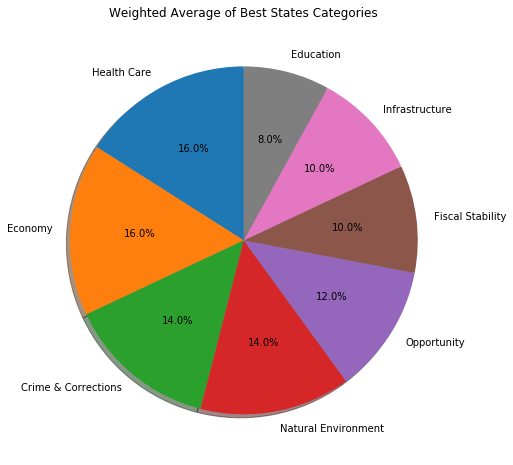

In [15]:
#Create chart of weights of best state categories

labels = 'Health Care', 'Economy', 'Crime & Corrections', 'Natural Environment', 'Opportunity', 'Fiscal Stability', 'Infrastructure', 'Education'
sizes = [16, 16, 14, 14, 12, 10, 10, 8]

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Weighted Average of Best States Categories')

plt.show();

In [16]:
#Create columns for weighted totals
states['Healthcare Weight'] = states['Health Care']*16
states['Economy Weight'] = states['Economy']*16
states['Crime Weight'] = states['Crime & Corrections']*14
states['Environment Weight'] = states['Natural Environment']*14
states['Opportunity Weight'] = states['Opportunity']*12
states['Fiscal Weight'] = states['Fiscal Stability']*10
states['Infrastructure Weight'] = states['Infrastructure']*10
states['Education Weight'] = states['Education']*8
states

,State,Code,Health Care,Economy,Natural Environment,Crime & Corrections,Opportunity,Fiscal Stability,Infrastructure,Education,Cost Rank,Healthcare Weight,Economy Weight,Crime Weight,Environment Weight,Opportunity Weight,Fiscal Weight,Infrastructure Weight,Education Weight
0,Washington,WA,4.0,3.0,14.0,15.0,19.0,22.0,2.0,4.0,38.0,64.0,48.0,210.0,196.0,228.0,220.0,20.0,32.0
1,New Hampshire,NH,16.0,13.0,4.0,1.0,1.0,10.0,31.0,5.0,37.0,256.0,208.0,14.0,56.0,12.0,100.0,310.0,40.0
2,Minnesota,MN,10.0,18.0,3.0,16.0,3.0,25.0,6.0,17.0,31.0,160.0,288.0,224.0,42.0,36.0,250.0,60.0,136.0
3,Utah,UT,9.0,2.0,49.0,12.0,24.0,5.0,3.0,10.0,27.0,144.0,32.0,168.0,686.0,288.0,50.0,30.0,80.0
4,Vermont,VT,11.0,29.0,7.0,2.0,10.0,19.0,28.0,8.0,39.0,176.0,464.0,28.0,98.0,120.0,190.0,280.0,64.0
5,Maryland,MD,8.0,26.0,25.0,22.0,5.0,15.0,21.0,13.0,44.0,128.0,416.0,308.0,350.0,60.0,150.0,210.0,104.0
6,Virginia,VA,18.0,25.0,18.0,9.0,9.0,8.0,35.0,7.0,30.0,288.0,400.0,126.0,252.0,108.0,80.0,350.0,56.0
7,Massachusetts,MA,2.0,7.0,26.0,4.0,29.0,30.0,44.0,1.0,46.0,32.0,112.0,56.0,364.0,348.0,300.0,440.0,8.0
8,Nebraska,NE,27.0,21.0,27.0,24.0,15.0,7.0,9.0,6.0,14.0,432.0,336.0,336.0,378.0,180.0,70.0,90.0,48.0
9,Colorado,CO,12.0,1.0,31.0,29.0,28.0,29.0,8.0,11.0,33.0,192.0,16.0,406.0,434.0,336.0,290.0,80.0,88.0


In [17]:
#Create column of weighted average of best state traits
states['Best States Weighted Average'] = (states.loc[:, 'Healthcare Weight':'Education Weight'].sum(axis=1))/100
states

,State,Code,Health Care,Economy,Natural Environment,Crime & Corrections,Opportunity,Fiscal Stability,Infrastructure,Education,Cost Rank,Healthcare Weight,Economy Weight,Crime Weight,Environment Weight,Opportunity Weight,Fiscal Weight,Infrastructure Weight,Education Weight,Best States Weighted Average
0,Washington,WA,4.0,3.0,14.0,15.0,19.0,22.0,2.0,4.0,38.0,64.0,48.0,210.0,196.0,228.0,220.0,20.0,32.0,10.18
1,New Hampshire,NH,16.0,13.0,4.0,1.0,1.0,10.0,31.0,5.0,37.0,256.0,208.0,14.0,56.0,12.0,100.0,310.0,40.0,9.96
2,Minnesota,MN,10.0,18.0,3.0,16.0,3.0,25.0,6.0,17.0,31.0,160.0,288.0,224.0,42.0,36.0,250.0,60.0,136.0,11.96
3,Utah,UT,9.0,2.0,49.0,12.0,24.0,5.0,3.0,10.0,27.0,144.0,32.0,168.0,686.0,288.0,50.0,30.0,80.0,14.78
4,Vermont,VT,11.0,29.0,7.0,2.0,10.0,19.0,28.0,8.0,39.0,176.0,464.0,28.0,98.0,120.0,190.0,280.0,64.0,14.20
5,Maryland,MD,8.0,26.0,25.0,22.0,5.0,15.0,21.0,13.0,44.0,128.0,416.0,308.0,350.0,60.0,150.0,210.0,104.0,17.26
6,Virginia,VA,18.0,25.0,18.0,9.0,9.0,8.0,35.0,7.0,30.0,288.0,400.0,126.0,252.0,108.0,80.0,350.0,56.0,16.60
7,Massachusetts,MA,2.0,7.0,26.0,4.0,29.0,30.0,44.0,1.0,46.0,32.0,112.0,56.0,364.0,348.0,300.0,440.0,8.0,16.60
8,Nebraska,NE,27.0,21.0,27.0,24.0,15.0,7.0,9.0,6.0,14.0,432.0,336.0,336.0,378.0,180.0,70.0,90.0,48.0,18.70
9,Colorado,CO,12.0,1.0,31.0,29.0,28.0,29.0,8.0,11.0,33.0,192.0,16.0,406.0,434.0,336.0,290.0,80.0,88.0,18.42


In [18]:
#Create average score of weighted best state score and cost of living score
states['Total Score'] = states[['Cost Rank', 'Best States Weighted Average']].mean(axis=1)
states.sort_values(by=['Total Score'])

,State,Code,Health Care,Economy,Natural Environment,Crime & Corrections,Opportunity,Fiscal Stability,Infrastructure,Education,...,Healthcare Weight,Economy Weight,Crime Weight,Environment Weight,Opportunity Weight,Fiscal Weight,Infrastructure Weight,Education Weight,Best States Weighted Average,Total Score
27,Missouri,MO,41.0,23.0,9.0,44.0,11.0,16.0,25.0,27.0,...,656.0,368.0,616.0,126.0,132.0,160.0,250.0,216.0,25.24,14.62
16,Georgia,GA,39.0,11.0,20.0,27.0,21.0,9.0,10.0,30.0,...,624.0,176.0,378.0,280.0,252.0,90.0,100.0,240.0,21.40,15.20
21,Kansas,KS,33.0,36.0,8.0,32.0,16.0,35.0,7.0,15.0,...,528.0,576.0,448.0,112.0,192.0,350.0,70.0,120.0,23.96,15.98
8,Nebraska,NE,27.0,21.0,27.0,24.0,15.0,7.0,9.0,6.0,...,432.0,336.0,336.0,378.0,180.0,70.0,90.0,48.0,18.70,16.35
29,Tennessee,TN,43.0,12.0,37.0,43.0,26.0,1.0,13.0,35.0,...,688.0,192.0,602.0,518.0,312.0,10.0,130.0,280.0,27.32,16.66
13,Iowa,IA,20.0,32.0,32.0,19.0,2.0,17.0,23.0,9.0,...,320.0,512.0,266.0,448.0,24.0,170.0,230.0,72.0,20.42,16.71
32,Michigan,MI,24.0,19.0,29.0,35.0,14.0,27.0,41.0,37.0,...,384.0,304.0,490.0,406.0,168.0,270.0,410.0,296.0,27.28,17.14
30,Wyoming,WY,42.0,42.0,17.0,17.0,22.0,39.0,15.0,16.0,...,672.0,672.0,238.0,238.0,264.0,390.0,150.0,128.0,27.52,18.76
15,Idaho,ID,26.0,6.0,15.0,8.0,35.0,11.0,29.0,33.0,...,416.0,96.0,112.0,210.0,420.0,110.0,290.0,264.0,19.18,19.09
47,Mississippi,MS,50.0,48.0,11.0,26.0,44.0,44.0,45.0,46.0,...,800.0,768.0,364.0,154.0,528.0,440.0,450.0,368.0,38.72,19.86


In [19]:
#Map the Lowest Cost of Living States
states['text1']= states['State']

Color Scales Options<br>

            'aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd'.

In [20]:
data1 = dict(type='choropleth',
            colorscale = 'agsunset',
            locations = states['Code'],
            z = states['Cost Rank'],
            locationmode = 'USA-states',
            text = states['text1'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            #marker = set of nested dictionaries that define a marker rgb = red, green, blue
            #separates states with line thickness and color
            colorbar = {'title':"Cost of Living"}
            ) 

In [21]:
layout1 = dict(title = 'State Rankings of Lowest Cost of Living',
              geo = dict(scope='usa', 
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)') 
             )

In [22]:
choromap1 = go.Figure(data = [data1],layout = layout1)

In [23]:
iplot(choromap1)

In [24]:
#Map the Best states to live in ranking
states['text2']= states['State']

In [25]:
data2 = dict(type='choropleth',
            colorscale = 'armyrose',
            locations = states['Code'],
            z = states['Best States Weighted Average'],
            locationmode = 'USA-states',
            text = states['text2'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            #marker = set of nested dictionaries that define a marker rgb = red, green, blue
            #separates states with line thickness and color
            colorbar = {'title':"Best States"}
            ) 

In [26]:
layout2 = dict(title = 'State Rankings of Best States to Live in',
              geo = dict(scope='usa', 
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)') 
             )

In [27]:
choromap2 = go.Figure(data = [data2],layout = layout2)

In [28]:
iplot(choromap2)

In [29]:
#Map the average of Best States Ranking with Low Cost of Living
states['text']= states['State']+'<br>Cost Rank  ' + states['Cost Rank'].astype(str)+ '<br>Best States Average Rank '+states['Best States Weighted Average'].astype(str)
states['text']

0     Washington<br>Cost Rank  38.0<br>Best States A...
1     New Hampshire<br>Cost Rank  37.0<br>Best State...
2     Minnesota<br>Cost Rank  31.0<br>Best States Av...
3     Utah<br>Cost Rank  27.0<br>Best States Average...
4     Vermont<br>Cost Rank  39.0<br>Best States Aver...
5     Maryland<br>Cost Rank  44.0<br>Best States Ave...
6     Virginia<br>Cost Rank  30.0<br>Best States Ave...
7     Massachusetts<br>Cost Rank  46.0<br>Best State...
8     Nebraska<br>Cost Rank  14.0<br>Best States Ave...
9     Colorado<br>Cost Rank  33.0<br>Best States Ave...
10    Wisconsin<br>Cost Rank  25.0<br>Best States Av...
11    New Jersey<br>Cost Rank  42.0<br>Best States A...
12    Florida<br>Cost Rank  26.0<br>Best States Aver...
13    Iowa<br>Cost Rank  13.0<br>Best States Average...
14    North Dakota<br>Cost Rank  28.0<br>Best States...
15    Idaho<br>Cost Rank  19.0<br>Best States Averag...
16    Georgia<br>Cost Rank  9.0<br>Best States Avera...
17    North Carolina<br>Cost Rank  22.0<br>Best 

In [30]:
data = dict(type='choropleth',
            colorscale = 'viridis',
            locations = states['Code'],
            z = states['Total Score'],
            locationmode = 'USA-states',
            text = states['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            #marker = set of nested dictionaries that define a marker rgb = red, green, blue
            #separates states with line thickness and color
            colorbar = {'title':"Average Ranking"}
            ) 

In [31]:
layout = dict(title = 'Best States with Low Cost of Living',
              geo = dict(scope='usa', 
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)') 
             )

In [32]:
choromap = go.Figure(data = [data],layout = layout)

In [33]:
iplot(choromap)

Washington, Oregon, and Colorado seem to be our preferences for states to live in.